In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from nibabel.testing import data_path
import keras
print("TensorFlow version is ", tf.__version__)
print("Keras version is ", keras.__version__)
print("NiBabel version is ", nib.__version__)

TensorFlow version is  2.3.1
Keras version is  2.3.1
NiBabel version is  3.2.0


Using TensorFlow backend.


In [2]:
### /Users/shossein/anaconda3/envs/m36/lib/python3.6/site-packages/nibabel/tests/data/Pat_1_1-post.nii.gz
# example_filename = os.path.join(data_path, 'example4d.nii.gz')
example_filename = os.path.join(data_path, 'Pat_1_1-post.nii.gz')
img = nib.load(example_filename)
data = img.get_fdata()
print("Data shape is: ", data.shape)
hdr = img.header
# hdr.get_xyzt_units()

Data shape is:  (182, 218, 182)


In [3]:
print("\nMin = ", np.min(data), "\tMax = ", np.max(data), "\n")
data[91][0:217][91]


Min =  -0.0010085757821798325 	Max =  0.9951555728912354 



array([-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.48719708e-02,  3.67556922e-02,  5.99524565e-02,
        1.01438403e-01,  1.68313265e-01,  2.40054250e-01,  3.06186825e-01,
        3.63521934e-01,  4.12785798e-01,  4.53226537e-01,  3.96209300e-01,
        3.26044440e-01,  2.67309010e-01,  2.44289696e-01,  2.55574286e-01,
        2.62813807e-01,  2.64260203e-01,  2.99535215e-01,  3.36524010e-01,
        3.72857064e-01,  3.76381993e-01,  3.49583894e-01,  3.68550867e-01,
        4.21672553e-01,  4.18173254e-01,  3.75786692e-01,  3.29002738e-01,
        3.44774574e-01,  4.03652757e-01,  4.44197178e-01,  4.49432701e-01,
        4.09925580e-01,  3.70265216e-01,  3.38867337e-01,  3.44326973e-01,
        3.60960364e-01,  

In [4]:
data_scl = data
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        for k in range(data.shape[2]):
            if (data[i,j,k]) <= 0:  data_scl[i,j,k] = 0
            data_scl[i,j,k] *= 255
print("\nMin = ", np.min(data_scl), "\tMax = ", np.max(data_scl), "\n")
data_scl[91][0:217][91]


Min =  0.0 	Max =  253.76467108726501 



array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   3.79235254,   9.37270151,  15.28787641,
        25.8667928 ,  42.91988254,  61.21383369,  78.07764038,
        92.69809306, 105.26037857, 115.57276681, 101.03337139,
        83.14133227,  68.16379756,  62.29387254,  65.17144293,
        67.01752067,  67.38635167,  76.3814798 ,  85.81362247,
        95.07855132,  95.97740829,  89.14389297,  93.98047104,
       107.52650097, 106.63417965,  95.82560644,  83.89569819,
        87.91751638, 102.93145314, 113.27028036, 114.60533872,
       104.53102291,  94.41762999,  86.41117081,  87.80337811,
        92.04489291,  97.11646557, 103.02258745,  97.50608906,
        82.97895178,  69.08570409,  55.59977174,  42.70006433,
        31.25892006,  28.10356177,  32.83690698,  36.97

Text(0.5, 1, 'Center slices for image')

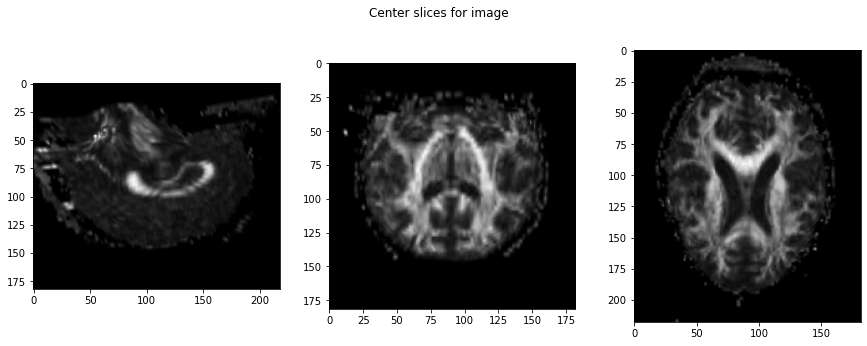

In [5]:
def show_slices(slices):
    fig, axes = plt.subplots(1, len(slices), figsize=(15,5))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="upper") # hot, Greys, gray
slice_0 = data[91, :, :]
slice_1 = data[:, 109, :]
slice_2 = data[:, :, 91]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for image", x=0.5, y=1)

Text(0.5, 1, 'Center slices for image')

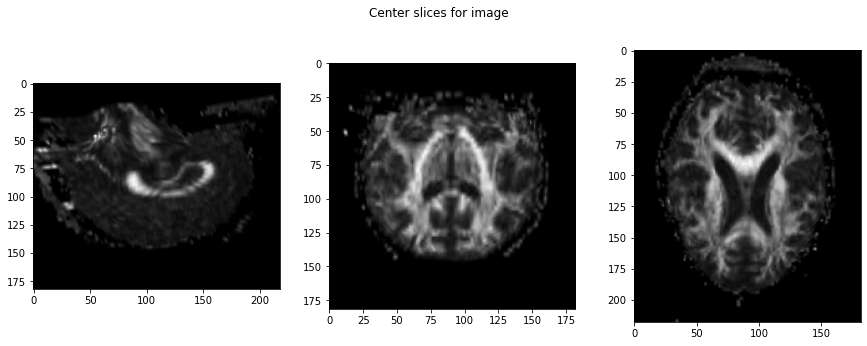

In [6]:
slice_0 = data_scl[91, :, :]
slice_1 = data_scl[:, 109, :]
slice_2 = data_scl[:, :, 91]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for image", x=0.5, y=1)